Pair trading is an extremely popular market-neutral strategy that profits from short-term deviations in the prices of historically co-moving assets. The traditional statistical models used for the investigation of such opportunities in these holds are cointegration with mean-reversion. However, most of the approaches collapse under volatile and non-linear market conditions.

Understanding the underlying behavior of the selected market would help design a machine learning long/short pair trading strategy. The primary asset for our analysis in this project is the currency pair EUR/USD. Best evidence needs to be presented by which a long/short strategy is market-neutral.

So we did a thorough market analysis spanning a decade between 2014 and 2023, digging into the market structure to determine whether EUR/USD mainly consists of uptrends, downtrends, or horizontal trends.

[*********************100%***********************]  1 of 1 completed


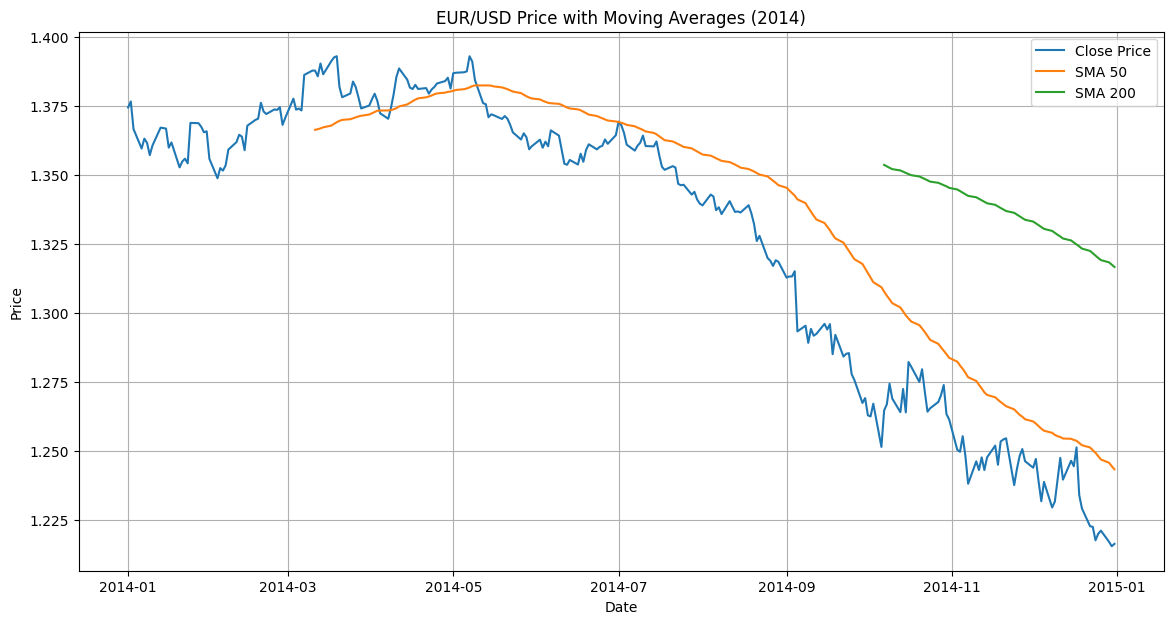

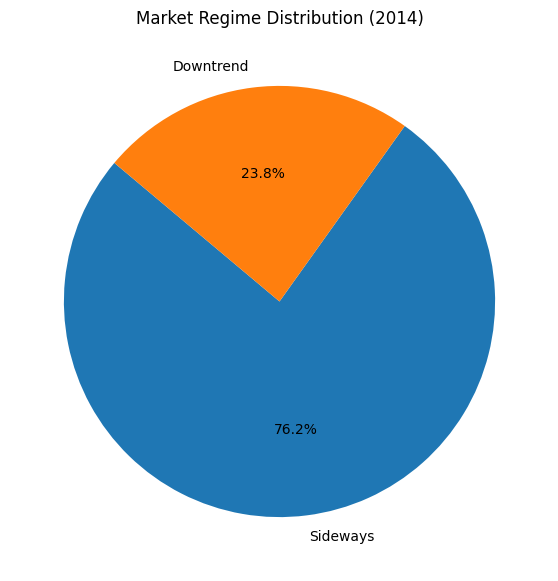

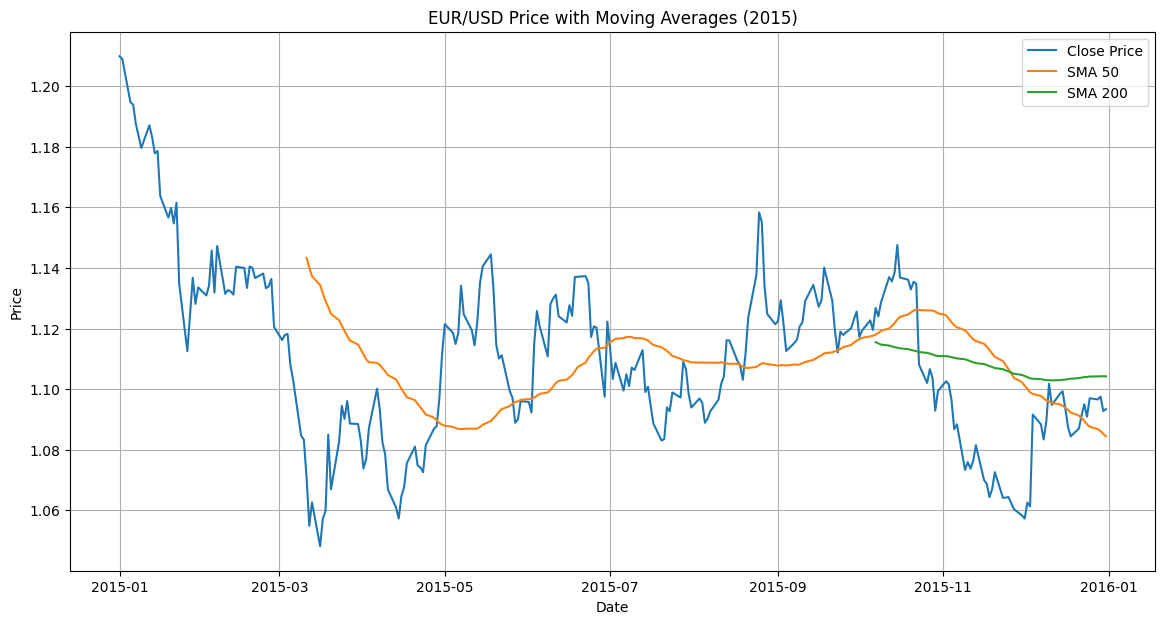

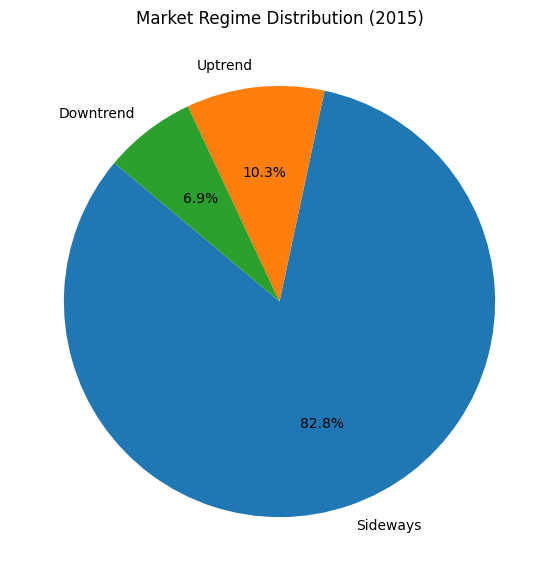

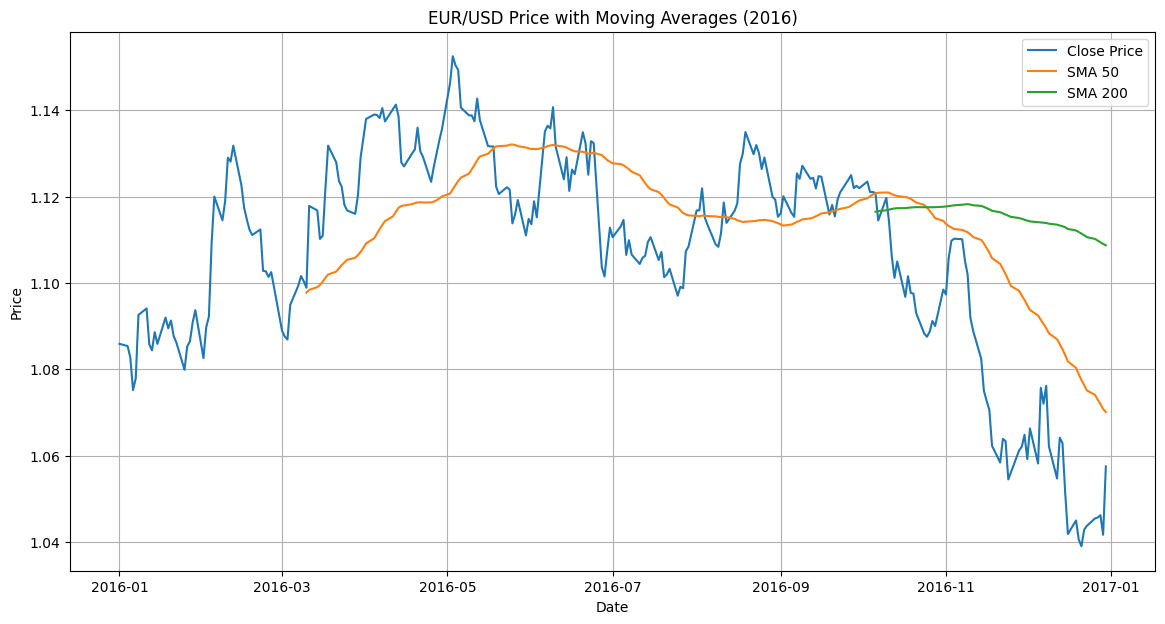

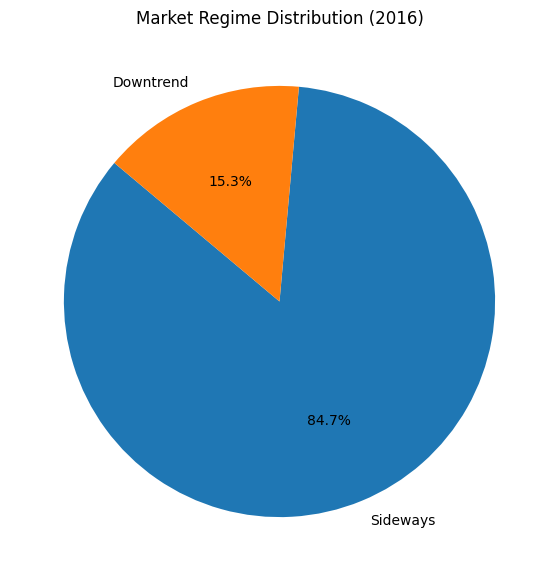

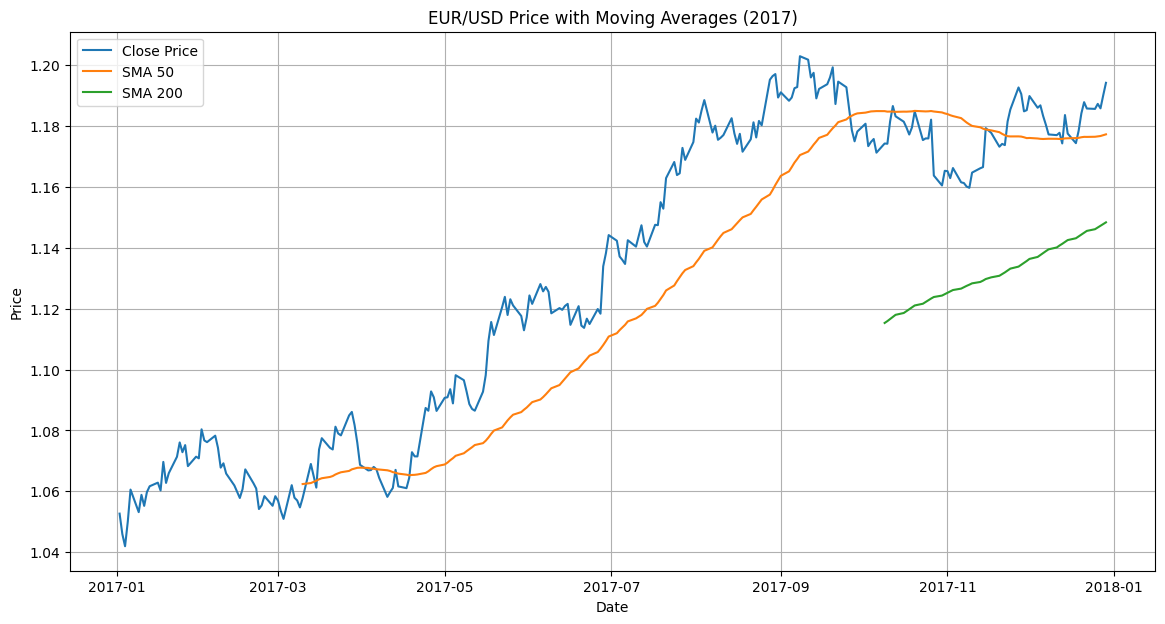

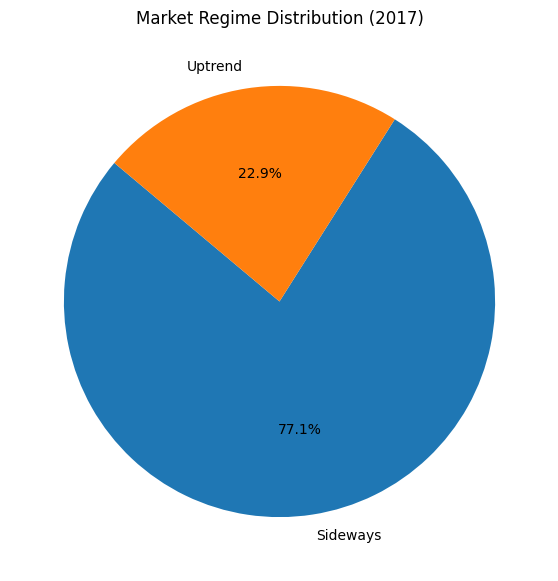

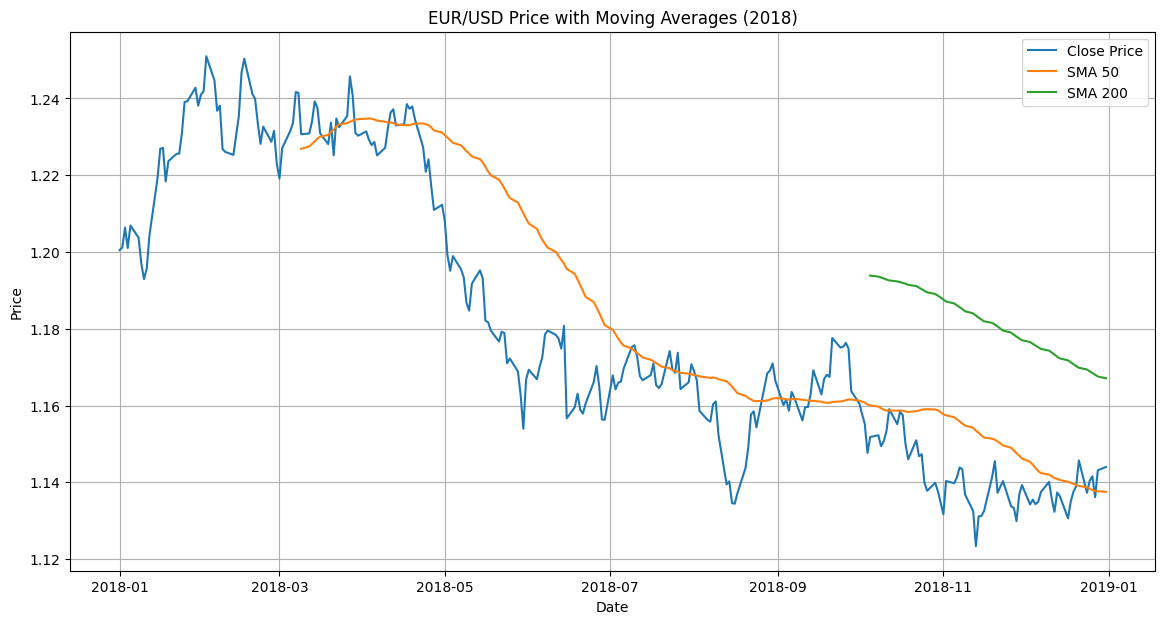

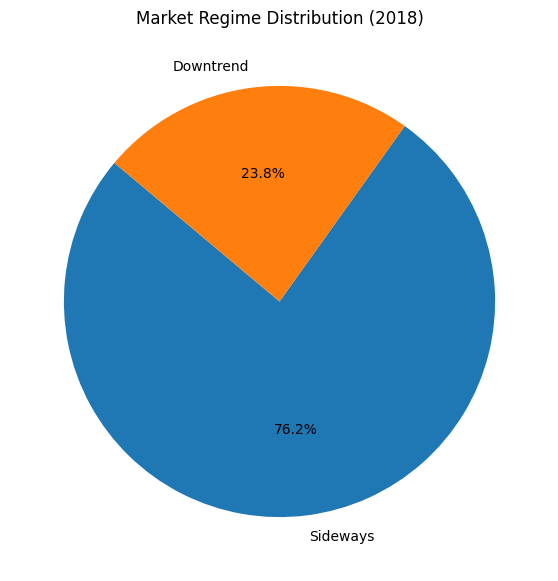

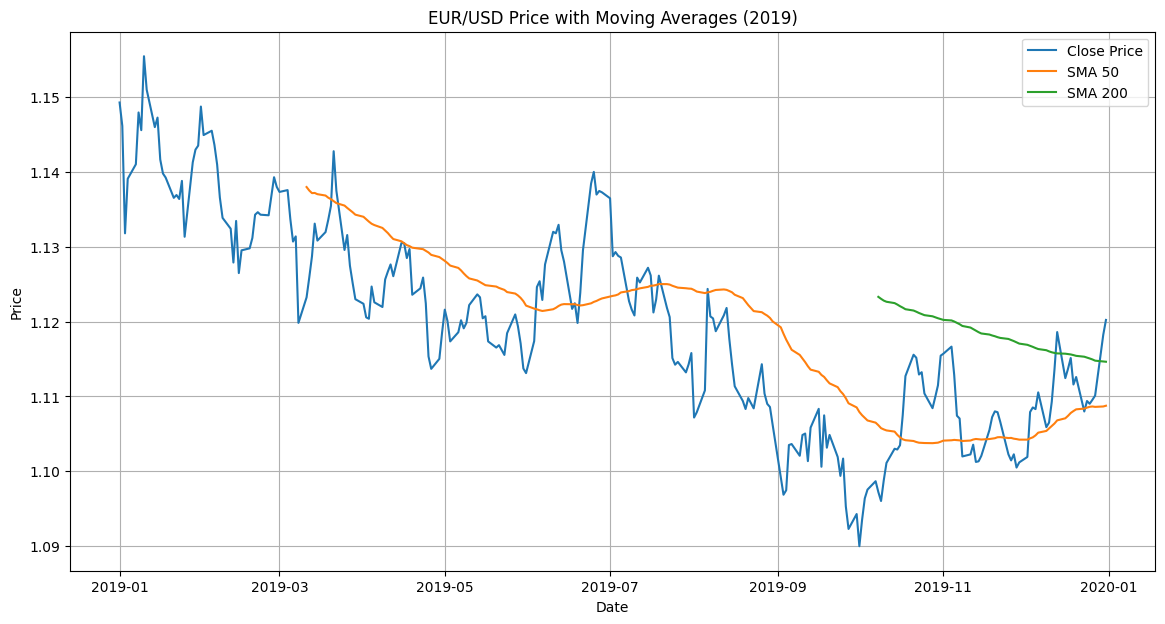

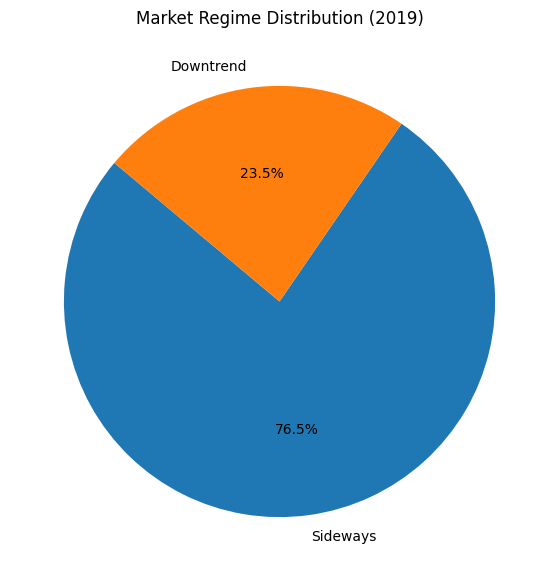

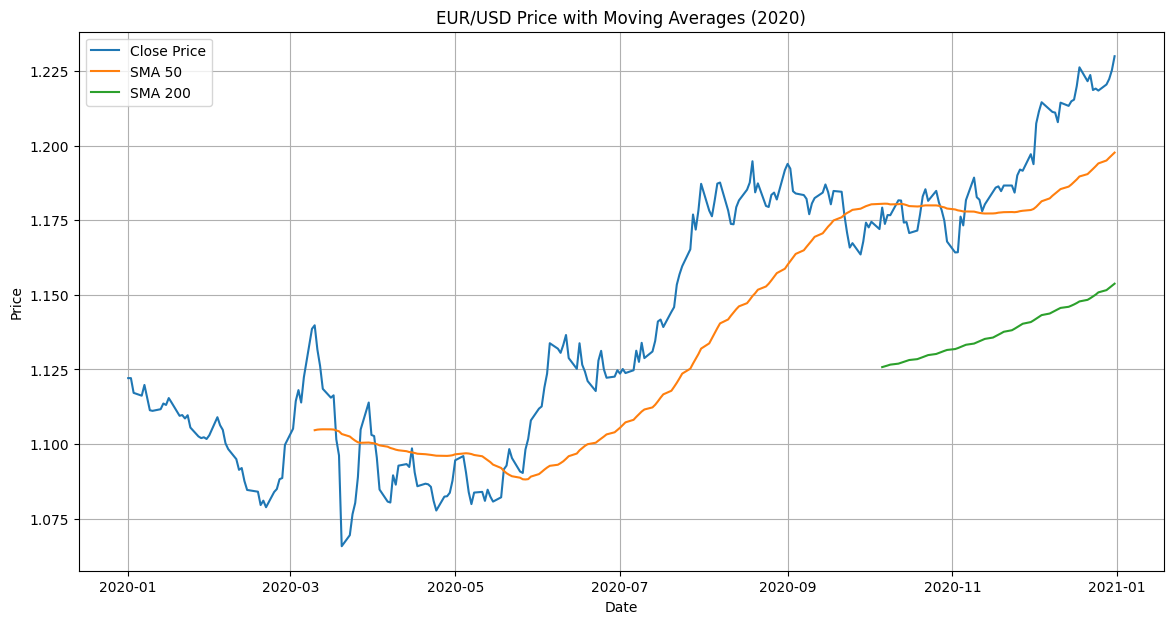

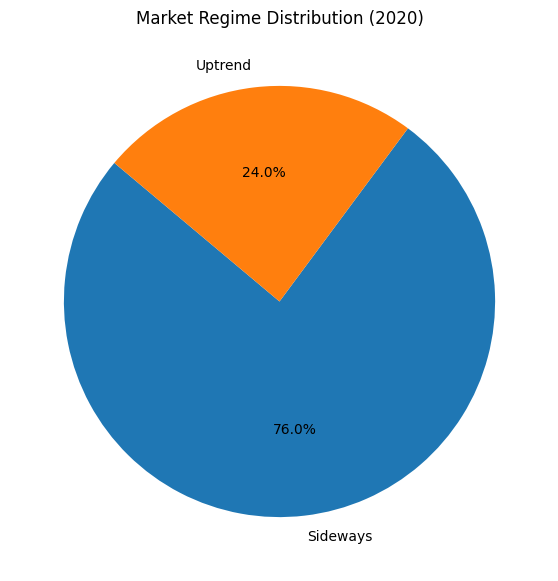

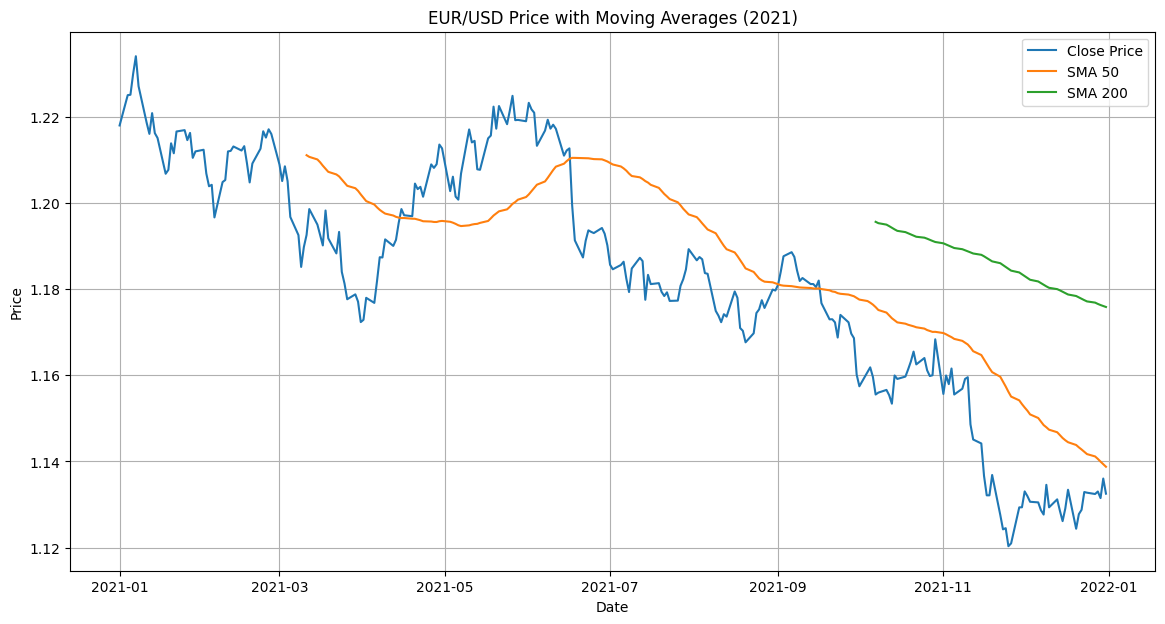

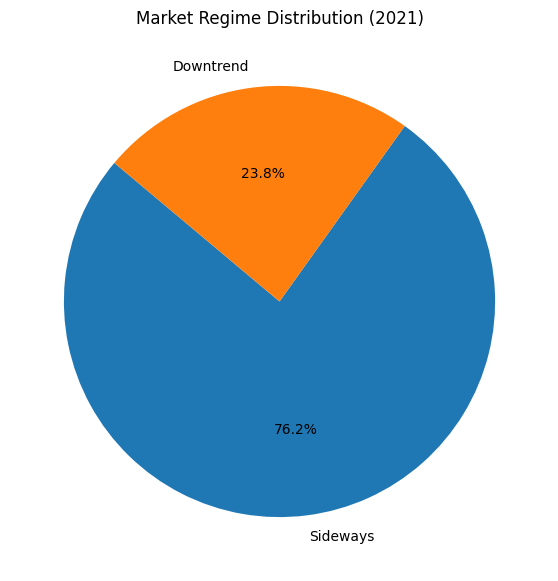

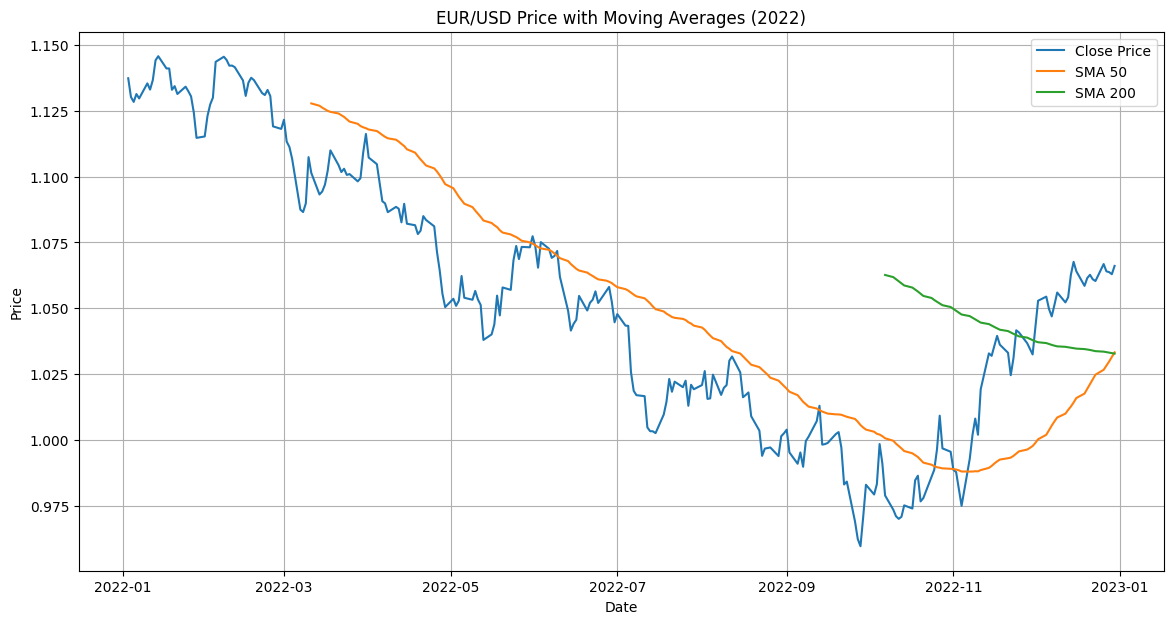

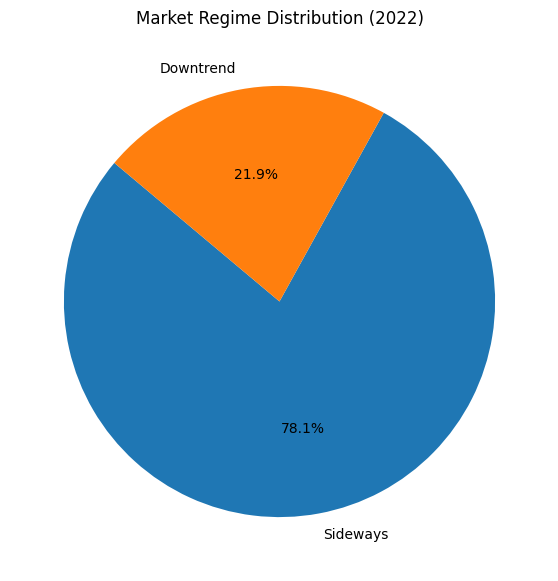

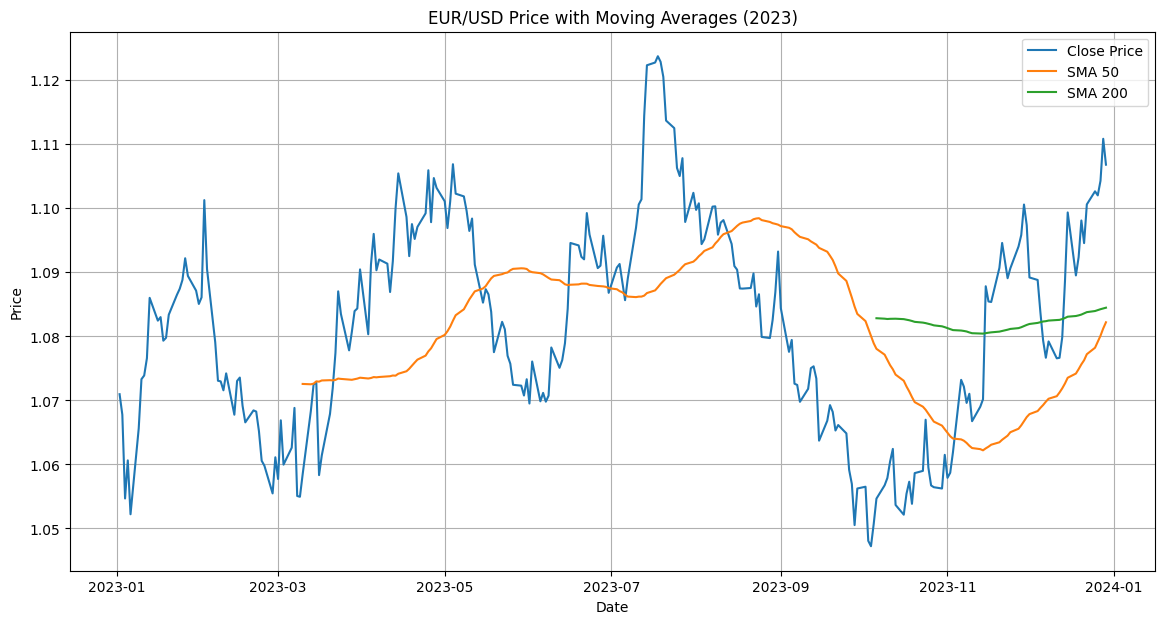

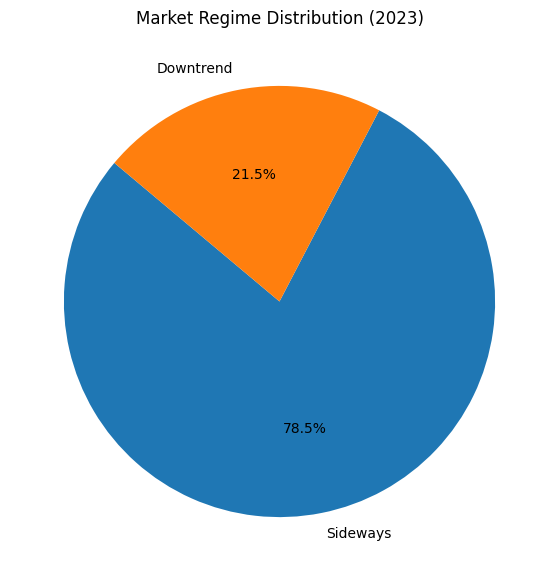


Yearly Market Regime Summary (% Time in Each Regime):
Market_Type  Downtrend  Sideways  Uptrend
2014             23.75     76.25     0.00
2015              6.90     82.76    10.34
2016             15.33     84.67     0.00
2017              0.00     77.13    22.87
2018             23.75     76.25     0.00
2019             23.46     76.54     0.00
2020              0.00     75.95    24.05
2021             23.75     76.25     0.00
2022             21.92     78.08     0.00
2023             21.54     78.46     0.00


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Download EUR/USD data (symbol: EURUSD=X)
data = yf.download('EURUSD=X', start='2014-01-01', end='2024-01-01', interval='1d')

# Basic cleaning
data = data.dropna()

# Prepare a container for summary results
yearly_summary = {}

# Loop over each year
for year in range(2014, 2024):
    yearly_data = data[(data.index >= f'{year}-01-01') & (data.index < f'{year+1}-01-01')].copy()

    if yearly_data.empty:
        continue

    yearly_data['SMA50'] = yearly_data['Close'].rolling(window=50).mean()
    yearly_data['SMA200'] = yearly_data['Close'].rolling(window=200).mean()

    high_low = yearly_data['High'] - yearly_data['Low']
    high_close = np.abs(yearly_data['High'] - yearly_data['Close'].shift())
    low_close = np.abs(yearly_data['Low'] - yearly_data['Close'].shift())
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    yearly_data['ATR14'] = true_range.rolling(window=14).mean()

    threshold = 0.005
    sma_diff = (yearly_data['SMA50'] - yearly_data['SMA200']) / yearly_data['SMA200']

    conditions = [
        sma_diff > threshold,
        sma_diff < -threshold,
        abs(sma_diff) <= threshold
    ]
    choices = ['Uptrend', 'Downtrend', 'Sideways']
    yearly_data['Market_Type'] = np.select(conditions, choices, default='Sideways')

    market_counts = yearly_data['Market_Type'].value_counts(normalize=True) * 100
    yearly_summary[year] = market_counts

    plt.figure(figsize=(14, 7))
    plt.plot(yearly_data.index, yearly_data['Close'], label='Close Price')
    plt.plot(yearly_data.index, yearly_data['SMA50'], label='SMA 50')
    plt.plot(yearly_data.index, yearly_data['SMA200'], label='SMA 200')
    plt.title(f'EUR/USD Price with Moving Averages ({year})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(7, 7))
    plt.pie(market_counts, labels=market_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Market Regime Distribution ({year})')
    plt.show()

# Summarize all years
yearly_summary_df = pd.DataFrame(yearly_summary).T.fillna(0)
print("\nYearly Market Regime Summary (% Time in Each Regime):")
print(yearly_summary_df.round(2))


Preliminary market structure analysis shows that EUR/USD exhibits a predominantly range-bound behavior over the last 10 years.

# **Key Observations:**

* Sideways/Range-Bound Behavior: On average, 76% to 85%
of the time, the EUR/USD market remained range-bound (non-directional) across all years.
* Limited Uptrend Phases: Notable uptrends were observed only in 2015, 2017, and 2020, and even then, they were relatively limited.
* Frequent Downtrends: Some years showed moderate periods of downtrends (e.g., 2014, 2018, 2019, 2022), but they did not dominate the market behavior.

# **Conclusion and Justification for Topic Selection**

The empirical evidence clearly indicates that the EUR/USD market predominantly operates in a sideways or non-directional regime over long periods. This market behavior makes trend-following strategies less effective and validates the choice of pursuing a market-neutral approach.

Given the range-bound nature of EUR/USD:

* Long/Short Pair Trading Strategies that exploit mean-reversion characteristics are highly appropriate.
* Machine Learning and Deep Learning models can be leveraged to better predict short-term divergences between asset pairs and generate profitable long/short trade signals.
* Focusing on building a data-driven, market-neutral
trading system based on these insights ensures alignment with the real-world behavior of the asset and increases the potential for success.

Thus, our project selection — applying machine/deep learning techniques to long/short pair trading strategies — is not only theoretically justified but also grounded in a careful empirical analysis of the target market.